# Simulating MIMIC Patient
We used Biogears engine to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [SepsisSimulation_main.cpp](https://github.com/faaizT/core/blob/mimic-simulator/projects/howto/SimulationScripts/src/SepsisSimulation_main.cpp) for more details.)  

In [1]:
import pandas as pd
icustayid = 80943.0
biogears_output = '/Users/faaiz/exportdir-biogears/SimulateMIMIC_80943.000000_2021-02-22.10-16-53.csv'
mimic_csv = "/USers/faaiz/exportdir/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(biogears_output, dtype={"Piperacillin-BloodConcentration": str, "Tazobactam-BloodConcentration": str})
simulation.head()

,Time(s),HeartRate(1/min),MeanArterialPressure(mmHg),SystolicArterialPressure(mmHg),DiastolicArterialPressure(mmHg),CardiacOutput(mL/min),HemoglobinContent(g),CentralVenousPressure(mmHg),Hematocrit,ArterialBloodPH,...,RespirationRate(1/min),OxygenSaturation,CarbonDioxideSaturation,CoreTemperature(degC),SkinTemperature(degC),Bicarbonate-BloodConcentration(ug/mL),Creatinine-BloodConcentration(ug/mL),Lactate-BloodConcentration(ug/mL),Piperacillin-BloodConcentration,Tazobactam-BloodConcentration
0,1.0,75.4000,90.8912,119.300,60.3437,6630.03,852.317,4.46083,0.459594,7.41074,...,15.0,0.980253,0.028532,37.0080,33.1100,1592.31,11.0697,79.3889,-1.$,-1.$
1,2.0,75.8015,90.8896,119.397,60.2919,6661.65,852.317,4.41740,0.459525,7.41107,...,15.0,0.980266,0.028546,37.0080,33.1104,1592.41,11.0667,79.3790,0,0
2,3.0,75.7750,90.8758,119.376,60.2848,6661.62,852.317,4.35742,0.459460,7.41145,...,15.0,0.980284,0.028560,37.0080,33.1107,1592.51,11.0647,79.3709,0,0
3,4.0,75.7429,90.8925,119.395,60.2957,6662.28,852.317,4.39428,0.459401,7.41141,...,15.0,0.980266,0.028561,37.0081,33.1111,1592.60,11.0626,79.3633,0,0
4,5.0,75.7590,90.9082,119.423,60.2999,6665.40,852.317,4.45887,0.459349,7.41131,...,15.0,0.980246,0.028559,37.0081,33.1114,1592.67,11.0591,79.3552,0,0


In [3]:
first_row = simulation.iloc[0].to_dict()
first_row['Time(s)'] = 0
simulation = pd.concat([pd.DataFrame([first_row]), simulation], ignore_index=True)
simulation.head()

,Time(s),HeartRate(1/min),MeanArterialPressure(mmHg),SystolicArterialPressure(mmHg),DiastolicArterialPressure(mmHg),CardiacOutput(mL/min),HemoglobinContent(g),CentralVenousPressure(mmHg),Hematocrit,ArterialBloodPH,...,RespirationRate(1/min),OxygenSaturation,CarbonDioxideSaturation,CoreTemperature(degC),SkinTemperature(degC),Bicarbonate-BloodConcentration(ug/mL),Creatinine-BloodConcentration(ug/mL),Lactate-BloodConcentration(ug/mL),Piperacillin-BloodConcentration,Tazobactam-BloodConcentration
0,0.0,75.4000,90.8912,119.300,60.3437,6630.03,852.317,4.46083,0.459594,7.41074,...,15.0,0.980253,0.028532,37.0080,33.1100,1592.31,11.0697,79.3889,-1.$,-1.$
1,1.0,75.4000,90.8912,119.300,60.3437,6630.03,852.317,4.46083,0.459594,7.41074,...,15.0,0.980253,0.028532,37.0080,33.1100,1592.31,11.0697,79.3889,-1.$,-1.$
2,2.0,75.8015,90.8896,119.397,60.2919,6661.65,852.317,4.41740,0.459525,7.41107,...,15.0,0.980266,0.028546,37.0080,33.1104,1592.41,11.0667,79.3790,0,0
3,3.0,75.7750,90.8758,119.376,60.2848,6661.62,852.317,4.35742,0.459460,7.41145,...,15.0,0.980284,0.028560,37.0080,33.1107,1592.51,11.0647,79.3709,0,0
4,4.0,75.7429,90.8925,119.395,60.2957,6662.28,852.317,4.39428,0.459401,7.41141,...,15.0,0.980266,0.028561,37.0081,33.1111,1592.60,11.0626,79.3633,0,0


In [4]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [5]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

31

In [6]:
MIMICtable_filtered.insert(0,'Time(s)',MIMICtable_filtered['charttime']-MIMICtable_filtered['charttime'].values[0])

In [7]:
MIMICtable_filtered.head()

,Time(s),bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
1793,0.0,1.0,80943.0,7.325144e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,...,0.640340,225.714286,0.00,0.00,1000.000000,0.000000,6220.0,3110.0,-5220.000000,1.0
1794,10800.0,4.0,80943.0,7.325155e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,...,0.640340,265.714286,0.00,0.00,1000.000000,0.000000,9230.0,3010.0,-8230.000000,1.0
1795,14400.0,5.0,80943.0,7.325158e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,...,0.664948,232.500000,0.12,0.12,1516.666667,516.666667,12240.0,3010.0,-10723.333333,1.0
1796,18000.0,6.0,80943.0,7.325162e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,...,0.663158,302.857143,0.10,0.12,2016.666667,500.000000,14910.0,2670.0,-12893.333333,1.0
1797,21600.0,7.0,80943.0,7.325165e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,...,0.510549,302.857143,0.08,0.09,2016.666667,0.000000,17180.0,2270.0,-15163.333333,1.0


In [8]:
simulation = simulation[simulation['Time(s)'].isin(MIMICtable_filtered['Time(s)'])]

In [9]:
time = simulation['Time(s)']
diaBP_biogears = simulation['DiastolicArterialPressure(mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

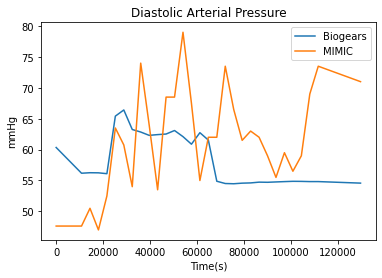

In [11]:
import matplotlib.pyplot as plt
plt.plot(time, diaBP_biogears)
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

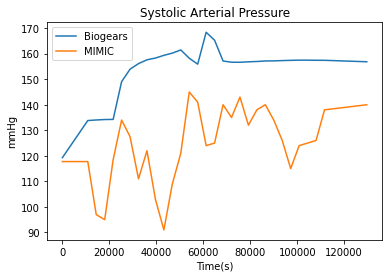

In [12]:
sysBP_biogears = simulation['SystolicArterialPressure(mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_biogears))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

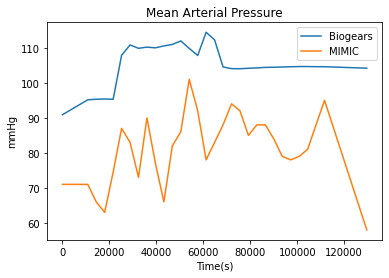

In [13]:
meanBP_biogears = simulation['MeanArterialPressure(mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_biogears))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

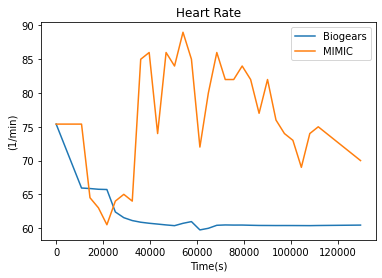

In [14]:
HR_biogears = simulation['HeartRate(1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_biogears))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Heart Rate')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

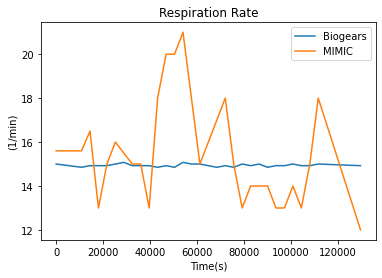

In [15]:
RR_biogears = simulation['RespirationRate(1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_biogears))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

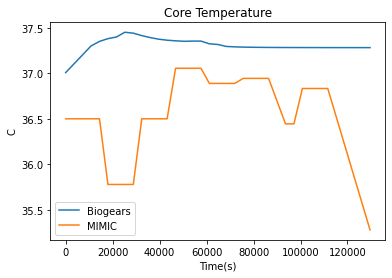

In [16]:
temp_biogears = simulation['CoreTemperature(degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_biogears))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

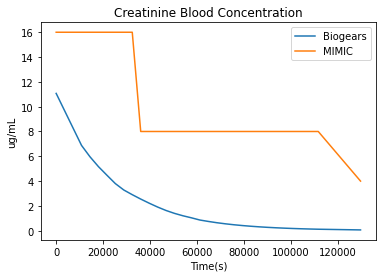

In [17]:
creatinine_biogears = simulation['Creatinine-BloodConcentration(ug/mL)']
creatinine_mimic = MIMICtable_filtered['Creatinine']*10
plt.plot(time, pd.to_numeric(creatinine_biogears))
plt.plot(time, creatinine_mimic)
plt.xlabel('Time(s)')
plt.ylabel('ug/mL')
plt.title('Creatinine Blood Concentration')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

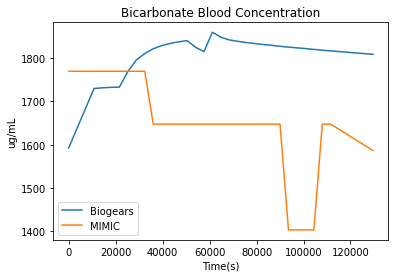

In [18]:
bicarbonate_biogears = simulation['Bicarbonate-BloodConcentration(ug/mL)']
bicarbonate_mimic = MIMICtable_filtered['HCO3']*61.0168
plt.plot(time, pd.to_numeric(bicarbonate_biogears))
plt.plot(time, bicarbonate_mimic)
plt.xlabel('Time(s)')
plt.ylabel('ug/mL')
plt.title('Bicarbonate Blood Concentration')
plt.legend(['Biogears', 'MIMIC'])
plt.show()